In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [190]:
# class NeuralNetwork:
#     def __init__(self, layers, lr =  0.003):
#         self.y_hat = 0

#         self.layers = layers
        
#         self.lr = lr

#     def fit(self, X, y, iters):
#         loss =[]

#         for i in range(iters):
#             loss.append(SE.loss(model.forward(X),y))
#             model.backward(X, y)
#         return loss

#     def predict(self, X):
#         return self.forward(X)

#     def forward(self, X_batch):
#         layer_input = X_batch
#         for i in range(0, len(self.layers)):
#             layer_input = self.layers[i].forward(layer_input)
#         return layer_input



#     def backward(self, X_batch, y_batch):
#         desired_neuron_value = y_batch - [neuron.curr_val for neuron in self.layers[len(self.layers)-1].neurons]
#         for i in range(len(self.layers)-1, 1, -1):
#             # print("layer: ",i,"to: ", i-1)
#             desired_neuron_value = self.layers[i].backward([neuron.curr_val for neuron in self.layers[i-1].neurons], desired_neuron_value, self.lr)
#             # print("curr_val",curr_y)
#         desired_neuron_value = self.layers[0].backward(X_batch, desired_neuron_value, self.lr)

# # class InputLayer:
# #     def __init__(self, size):
# #         self.size = size # ofc 1D
# #         self.curr_val = np.zeros(size)



# class DenseLayer:
#     def __init__(self, no_neurons, activation_function, no_inputs, loss):
#         self.neurons = []
#         for i in range(no_neurons):
#             self.neurons.append(Neuron(activation_function, no_inputs, loss))

#     def forward(self, inputs):
#         output = []
#         for i in range(len(self.neurons)):
#             output.append(self.neurons[i].forward(inputs))
#         return output
    
#     def backward(self, inputs, desired_neuron_values_input, lr):
#         # a = []
#         desired_neuron_values_out = np.zeros((len(self.neurons), len(self.neurons[0].weights)-1))
#         for i in range(len(self.neurons)):
#             desired_neuron_values_out = np.zeros((len(self.neurons), len(self.neurons[i].weights)-1))
#             print(len(self.neurons), i, desired_neuron_values_out.shape)
#             desired_neuron_values_out[i] = self.neurons[i].backward(inputs, desired_neuron_values_input[i], lr)
#             # a.append(self.neurons[i].backward(inputs, desired_neuron_value, lr))
#         return desired_neuron_values_out


# class Neuron:
#     def __init__(self, activation_function, no_inputs, loss):
#         self.curr_val = 0
#         self.activation = activation_function
#         self.weights = np.random.rand(no_inputs + 1) # last weight for bias
#         self.loss = loss

#     def forward(self, inputs):
#         self.curr_val = self.activation.f(np.dot(self.weights, np.concatenate((inputs, np.ones(1)), axis=0))) # one at the end for bias
#         return self.curr_val

#     def backward(self, inputs, desired_neuron_value, lr):
#         y_hat = self.curr_val
#         # dC = self.loss.d_loss(y_hat, desired_neuron_value)
#         dC = np.sum(desired_neuron_value)
#         df = self.activation.df(y_hat)
#         dz = np.concatenate((inputs, np.ones(1)), axis=0)
#         # print("weights: ", self.weights)
#         # print(np.concatenate((lr*dC*np.asanyarray(df)*np.asanyarray(dz), np.ones(1)), axis=0))
#         self.weights -= lr*dC*np.asanyarray(df)*np.asanyarray(dz)
#         return self.weights[:-1] * np.sum(desired_neuron_value)
#         #return self.forward(inputs) # to wsm nie jestem pewien czy nie y_hat, wsm to po co to komu



# class SE:
#     #f. straty
#     def loss(y_out, y):
#         return np.sum((y_out - y) ** 2 )

#     #pochodna f. straty
#     def d_loss(y_out, y):
#         return np.sum(2*( y_out - y ) )


# class Sigmoid:
#     # sigmoid
#     def f(x):
#         return 1/(1+np.exp(-x))

#     # d sigmoid
#     def df(x):
#         s = 1/(1+np.exp(-x))
#         return s * (1-s)



# p = [3,7]

# L_BOUND = -5
# U_BOUND = 5

# def q(x):
#     return np.sin(x*np.sqrt(p[0]+1))+np.cos(x*np.sqrt(p[1]+1))

# x = np.linspace(L_BOUND, U_BOUND, 100)
# y = q(x)

In [7]:
class NeuralNetwork:
    def __init__(self, layers, lr =  0.003):
        self.y_hat = 0

        self.layers = layers
        
        self.lr = lr

    def fit(self, X, y, iters):
        loss =[]

        for i in range(iters):
            loss.append(SE.loss(model.forward(X),y))
            model.backward(X, y)
        return loss

    def predict(self, X):
        return self.forward(X)

    def forward(self, X_batch):
        layer_input = X_batch
        for i in range(0, len(self.layers)):
            layer_input = self.layers[i].forward(layer_input)
        return layer_input



    def backward(self, X_batch, y_batch):
        desired_neuron_value = y_batch - [neuron.curr_val for neuron in self.layers[len(self.layers)-1].neurons]
        iter = 0
        for i in range(len(self.layers)-1, 0, -1):
            # print("layer: ",i,"to: ", i-1)
            # if iter % 2 == 1:
            #     desired_neuron_value = desired_neuron_value.T
            desired_neuron_value = self.layers[i].backward([neuron.curr_val for neuron in self.layers[i-1].neurons], desired_neuron_value.T, self.lr)
            # print("curr_val",curr_y)
        desired_neuron_value = self.layers[0].backward(X_batch, desired_neuron_value.T, self.lr)

# class InputLayer:
#     def __init__(self, size):
#         self.size = size # ofc 1D
#         self.curr_val = np.zeros(size)



class DenseLayer:
    def __init__(self, no_neurons, activation_function, no_inputs, loss):
        self.neurons = []
        for i in range(no_neurons):
            self.neurons.append(Neuron(activation_function, no_inputs, loss))

    def forward(self, inputs):
        output = []
        for i in range(len(self.neurons)):
            output.append(self.neurons[i].forward(inputs))
        return output
    
    def backward(self, inputs, desired_neuron_values_input, lr):
        # a = []
        desired_neuron_values_out = np.zeros((len(self.neurons), len(self.neurons[0].weights)-1))
        for i in range(len(self.neurons)):
            desired_neuron_values_out = np.zeros((len(self.neurons), len(self.neurons[i].weights)-1))
            # print(len(self.neurons), i, desired_neuron_values_input.shape)
            desired_neuron_values_out[i] = self.neurons[i].backward(inputs, desired_neuron_values_input[i], lr)
            # a.append(self.neurons[i].backward(inputs, desired_neuron_value, lr))
        return desired_neuron_values_out


class Neuron:
    def __init__(self, activation_function, no_inputs, loss):
        self.curr_val = 0
        self.activation = activation_function
        self.weights = np.random.rand(no_inputs + 1) # last weight for bias
        self.loss = loss

    def forward(self, inputs):
        self.curr_val = self.activation.f(np.dot(self.weights, np.concatenate((inputs, np.ones(1)), axis=0))) # one at the end for bias
        return self.curr_val

    def backward(self, inputs, desired_neuron_value, lr):
        y_hat = self.curr_val
        # dC = self.loss.d_loss(y_hat, desired_neuron_value)
        dC = np.sum(desired_neuron_value)
        df = self.activation.df(y_hat)
        dz = np.concatenate((inputs, np.ones(1)), axis=0)
        # print("weights: ", self.weights)
        # print(np.concatenate((lr*dC*np.asanyarray(df)*np.asanyarray(dz), np.ones(1)), axis=0))
        self.weights += lr*dC*np.asanyarray(df)*np.asanyarray(dz)
        return self.weights[:-1] * np.sum(desired_neuron_value)
        #return self.forward(inputs) # to wsm nie jestem pewien czy nie y_hat, wsm to po co to komu



class SE:
    #f. straty
    def loss(y_out, y):
        return np.sum((y_out - y) ** 2 )

    #pochodna f. straty
    def d_loss(y_out, y):
        return np.sum(2*( y_out - y ) )


class Sigmoid:
    # sigmoid
    def f(x):
        return 1/(1+np.exp(-x))

    # d sigmoid
    def df(x):
        s = 1/(1+np.exp(-x))
        return s * (1-s)

class Linear:
    # aktywacja
    def f(x):
        return x

    #pochodna aktywacji
    def df(x):
        return 1


p = [3,7]

L_BOUND = -5
U_BOUND = 5

def q(x):
    return np.sin(x*np.sqrt(p[0]+1))+np.cos(x*np.sqrt(p[1]+1))

x = np.linspace(L_BOUND, U_BOUND, 100)
y = q(x)

In [203]:
2 %2

0

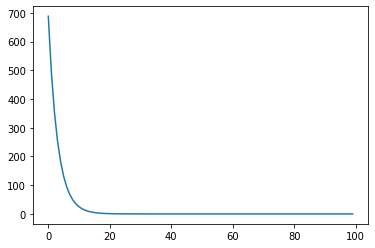

In [12]:
X_train, y_train = x[0:1], y[0:1]


no_inputs, no_outputs = 1, 1
l1_no_neurons, l2_no_neurons = 102, 50
activation_function, loss = Sigmoid, SE


l1 = DenseLayer(l1_no_neurons, activation_function, no_inputs, loss)
l2 = DenseLayer(l2_no_neurons, activation_function, l1_no_neurons, loss)
l3 = DenseLayer(no_outputs, Linear, l2_no_neurons, loss)

model = NeuralNetwork([l1, l2, l3])

history = model.fit(X_train, y_train, 100)

plt.plot(history)

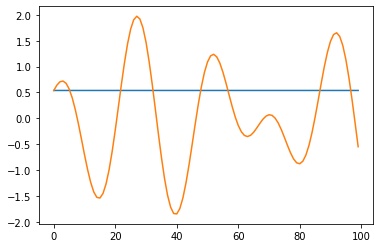

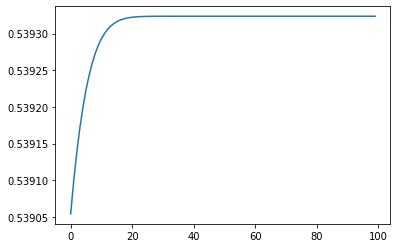

In [17]:
preds = []
for i in range(len(x)):
    preds.append(model.predict([x[i]]))

plt.figure(2)
plt.plot(preds)
plt.plot(y)

plt.figure(3)
plt.plot(preds)

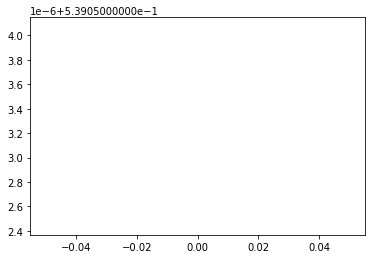

In [14]:
plt.plot(model.predict(X_train))
plt.plot(y_train)

In [10]:
history = model.fit(x[0:1],y[0:1],15000)

plt.plot(history)

ValueError: shapes (5,) and (2,) not aligned: 5 (dim 0) != 2 (dim 0)

In [66]:
model.backward(x[0:1], y[0:1])

In [89]:
loss =[]

for i in range(1000):
    loss.append(MSE.loss(model.forward(x[0:1]),y[0:1]))
    model.backward(x[0:1], y[0:1])

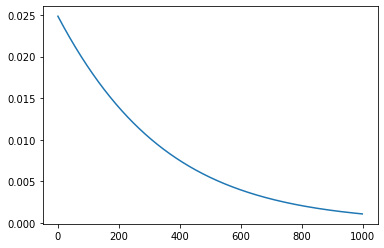

In [90]:
import matplotlib.pyplot as plt

plt.plot(loss)

In [75]:
y[0:1]

array([0.53905245])

In [81]:
model.forward(x[0:1])

[0.5393677269500305]

In [190]:
model.forward(q(x))

[0.8250496980609537]

In [77]:
l = Layer(3, Sigmoid, 2, MSE)
l.forward(np.random.rand(2))

[0.654010375127003, 0.665447462122757, 0.7138125266041396]

In [80]:
[neuron.curr_val for neuron in l.neurons]

[0.654010375127003, 0.665447462122757, 0.7138125266041396]

In [56]:
# MSE.d_loss(np.random.rand(2),np.random.rand(2))
Sigmoid.df(np.random.rand(2))

array([0.21731352, 0.24227232])

In [48]:
n = Neuron(Sigmoid,2)
a = np.random.rand(2)
print(a)
print(n.forward(a))


[0.70647677 0.5269317 ]
[0.50707922 0.2787334  0.37083607]
0.7059820983030131


In [36]:
np.random.rand(2).shape

(2,)

In [73]:
no_neurons, activation_function, no_inputs, loss = 3, Sigmoid, 2, MSE


l1 = DenseLayer(no_neurons, activation_function, no_inputs, loss)

l1.forward(np.random.rand(2))

[0.8207585634744234, 0.7775225847886832, 0.7595122192071764]

In [74]:
l1.backward(np.random.rand(2), np.random.rand(2), 0.001)

[0.6345884898264547, 0.5623302876299984, 0.5394256802301131]

In [70]:
n = Neuron(Sigmoid, 2, MSE)
n.backward(np.random.rand(2), np.random.rand(2), 0.001)

0.5709820654384472

In [113]:
a = []
a.append(1)
a.append(2)

np.asanyarray(a)*2.4

array([2.4, 4.8])